# ANALYZING INDIA'S EXPORT TRENDS FROM 2010 TO 2021: INSIGHTS AND PATTERNS IN GLOBAL TRADE

# Importing Necessary Librarys

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing Data

In [151]:
df = pd.read_csv("Export.csv")
df.head()

,HSCode,Commodity,value,country,year
0,2,MEAT AND EDIBLE MEAT OFFAL.,1.40,AFGHANISTAN,2010
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.08,AFGHANISTAN,2010
2,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,3.89,AFGHANISTAN,2010
3,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",NaN,AFGHANISTAN,2010
4,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,NaN,AFGHANISTAN,2010


## Q1, Which year had the highest exports, and which year had the lowest?

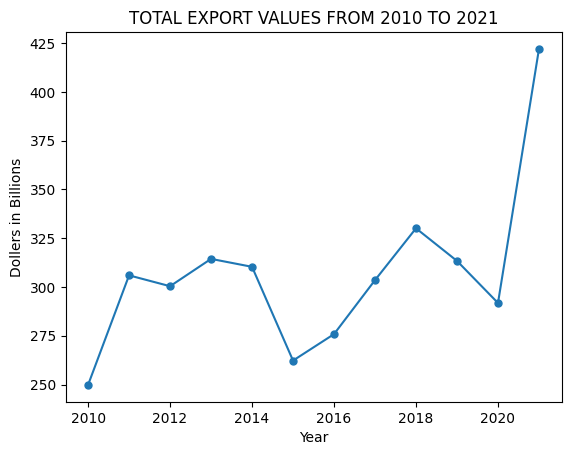

In [152]:
A = df.groupby("year").aggregate({"value": "sum"})
year = np.arange(2010, 2022)
Dollers_in_Billions = (A.to_numpy().ravel())/1000 
plt.plot(year, Dollers_in_Billions, marker = ".", markersize = 10)
plt.xlabel("Year")
plt.ylabel("Dollers in Billions")
plt.title("TOTAL EXPORT VALUES FROM 2010 TO 2021")
plt.show()

#### In 2021, India recorded its highest exports, reaching a value of 425 billion dollers, while 2010 saw the lowest exports, with a value of 250 billion dollers.

## Q2, What are the top ten commodities that India exports the most?

   HSCode                                          Commodity
0      27  MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...
1      71  NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...
2      84  NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...
3      87  VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING...
4      29                                  ORGANIC CHEMICALS
5      30                            PHARMACEUTICAL PRODUCTS
6      85  ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...
7      72                                     IRON AND STEEL
8      10                                           CEREALS.
9      62  ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, ...


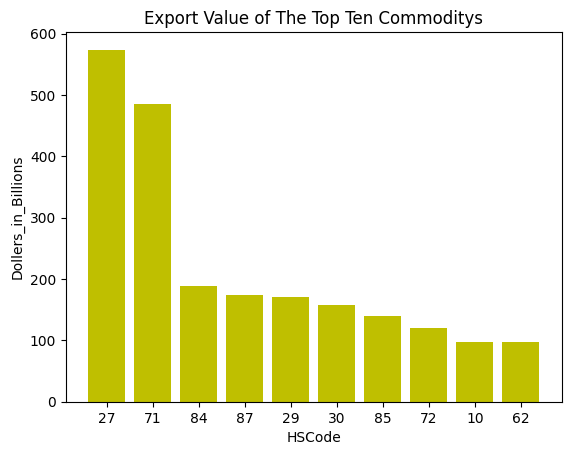

In [172]:
B = df.groupby(["Commodity", "HSCode"]).aggregate({"value": "sum"})
Sorted_Values = B.sort_values(by = "value")[ : : -1]
Top_Ten_Step_1 = (Sorted_Values[0 : 10])/1000
Top_Ten_Step_2 = Top_Ten_Step_1.reset_index()
Top_Ten_Exports = np.round(Top_Ten_Step_1.to_numpy().ravel(), 2)
print(Top_Ten_Step_2[["HSCode", "Commodity"]])
plt.bar((Top_Ten_Step_2["HSCode"].to_numpy()).astype(str), Top_Ten_Exports, color = "y")
plt.xlabel("HSCode")
plt.ylabel("Dollers_in_Billions")
plt.title("Export Value of The Top Ten Commoditys")
plt.show()

#### The commoditys that brought the most value during this time period from exporting were mineral fuels and mineral oils closely followed by pearls and other precious metals and stones. Nuclear reactors,Pharmaceutical products,Organic chemicals, Iron and steel, Clothing accessories etc: are also in the top ten.

## Q3, What are the top ten countrys India exports to the most?

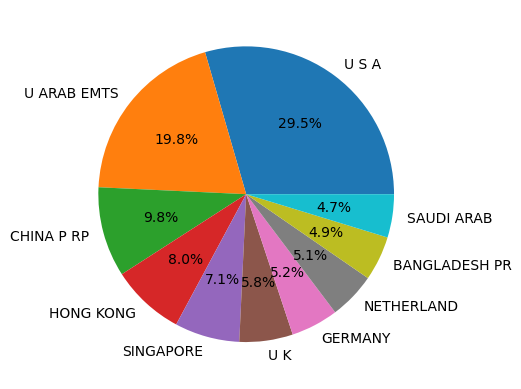

In [167]:
C = df.groupby("country").aggregate({"value" : "sum"})
Top_Countrys_Step_1 = C.sort_values(by = "value")[ : : -1]
Top_Countrys_Step_2 = (Top_Countrys_Step_1[0 : 10])/1000
Top_Ten_Countrys = np.round(Top_Countrys_Step_2.to_numpy().ravel(), 2)
plt.pie(Top_Ten_Countrys, labels = (Top_Countrys_Step_2.index).to_numpy().ravel(), autopct = "%1.1f%%")
plt.show()

#### USA is India biggest customer with 30 percent of all the commodities exported being send to USA from 2010 to 2021. Followed by UAE. China, UK , Germany and Singapore are also in the top ten

## Q4, What was the most exported commodity each year?

In [199]:
D = df.groupby(["year", "Commodity"]).aggregate({"value" : "sum"})
Per_Year_Comm_1 = D.reset_index() 
Per_Year_Comm_2 = Per_Year_Comm_1.sort_values(by = ["year", "value"])[ : : -1]
Per_Year_Comm_3 = Per_Year_Comm_2.groupby("year").first()
Per_Year_Comm_4 = Per_Year_Comm_3.rename(columns = {"value" : "Million_Dollers"})
Per_Year_Comm_4

,Commodity,Million_Dollers
year,,
2010,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",43684.89
2011,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",57391.80
2012,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",62105.38
2013,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",64685.28
2014,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",57619.94
2015,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",39553.82
2016,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",43623.03
2017,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",41743.33
2018,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",47920.23


#### The most exported commoditys between the years 2010 and 2021 were either Mineral Fuels and Mineral Oils or Pearls and other precious stones or metals.

## Q5, Which country did India export to the most each year?

In [200]:
E = df.groupby(["year", "country"]).aggregate({"value": "sum"})
Top_Step_1 = E.reset_index()
Top_Step_2 = Top_Step_1.sort_values(by = ["year", "value"])[ : : -1]
Top_Step_3 = Top_Step_2.groupby("year").first()
Top_Step_4 = Top_Step_3.rename(columns = {"value" : "Million_Dollers"})
Top_Step_4

,country,Million_Dollers
year,,
2010,U ARAB EMTS,33822.08
2011,U ARAB EMTS,35925.23
2012,U ARAB EMTS,36316.29
2013,U S A,39141.81
2014,U S A,42448.30
2015,U S A,40335.68
2016,U S A,42211.96
2017,U S A,47878.17
2018,U S A,52405.88


#### U.A.E was India's biggest customer from 2010 to 2012. From 2013 to 2021 USA became India's biggest customer